# Accessibility of Notebooks
This notebook shows a few features that can help make notebooks more accessible, such as proper headers, explanations, alt text, and comprehensible tables. A notebook always starts with a `<h1>` header (a single # creates this), followed by an explanation of the notebook, including the sources used, the author and the date. Each section starts with appropriate headers (the next is `<h2>`, and if there is a subsection, `<h3>`, etc.).

## Table of contents
- [Sources](#sources)
- [About](#about)
- [Installs and imports](#installs-and-imports)
- [Narration and errors](#narration-and-errors)
- [Alt text for static images](#alt-text-for-static-images)
    - [A combination of `![]()`](#a-combination-of-)
    - [As `<img>` tag](#as-img-tag)
- [Alt text for generated figures](#alt-text-for-generated-figures)
- [Data tables](#data-tables)
- [Final notes](#final-notes)

## References
1. [Project Notebooks For All](https://iota-school.github.io/notebooks-for-all/)
2. [Tutorial Accessible Pandas DataFrames](https://tonyfast.github.io/tonyfast/xxiii/2023-01-02-accessible-dataframes-basic-indexes.html)
3. [Repository Jupyter Accessibility](https://github.com/jupyter/accessibility/)
4. [Repository MatplotAlt](https://github.com/make4all/matplotalt) and [documentation](https://matplotalt.readthedocs.io/en/latest/)
5. [Paper of survey of notebook accessibility - Potluri et al., 2023](https://arxiv.org/pdf/2308.03241)
6. [Slides of notebook best practises - Isabela Presedo-Floyd, 2023](https://docs.google.com/presentation/d/1LBcEOGhZfLXCaGAWUaGl4c6O5AXBBXzfoA9dV0W-5Pc/)
7. [Tutorial for making Computational Notebooks accessible](https://create.uw.edu/a11y-in-action/accessible-courses/making-computational-notebooks-accessible/)


## About
Written by members of the [HIDIVE Lab](https://hidivelab.org).

Last edited on June 20th, 2025.

## Installs and imports
We will first install and import the necessary libraries, and set a random seed for reproducibility.

In [8]:
%pip install --quiet numpy pandas matplotlib matplotalt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotalt import show_with_alt, generate_alt_text, add_alt_text

/Users/tsmits/Documents/HIDIVE/Genomics/Accessibility/ISMB Tutorial/notebooks/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Set seed
np.random.seed(42)

## Narration and errors
We describe what happens in the notebook before it happens. This allows a user to follow along. If we expect an error, we mention this before, so someone knows what to expect. 

## Alt text for static images

You can add static images in two different ways: 
1. A combination of `![]()`
2. As an HTML img tag

In both, you can add alt text. Here, we show this with an image of a cell from Terese Winslow, 2014.

### A combination of `![]()`
We can add an image with the following syntax: `![]()`. Here, anything added in the square brackets is interpreted as the alt text. For example:

`![Schematic of a eukaryotic cell with various labelled organelles different  of a cell](https://nci-media.cancer.gov/pdq/media/images/761780.jpg)`


![Schematic of a eukaryotic cell with various labelled organelles different  of a cell](https://nci-media.cancer.gov/pdq/media/images/761780.jpg)


If we break the link, we can see how the alt text replaces the image:

![Schematic of a eukaryotic cell with various labelled organelles different  of a cell](https://nci-media.cancer.gov/pdq/media/image/761780.jpg)


### As `<img>` tag

We can also add an image with a HTML img tag. Here, we can add the "alt" attribute. We can also set other attributes for styling, such as the width:

`<img alt="Schematic of a eukaryotic cell with various labelled organelles different  of a cell" src="https://nci-media.cancer.gov/pdq/media/images/761780.jpg" width="200">`

<img alt="Schematic of a eukaryotic cell with various labelled organelles different  of a cell" src="https://nci-media.cancer.gov/pdq/media/images/761780.jpg" width="200">

Again, we can break the link:

<img alt="Schematic of a eukaryotic cell with various labelled organelles different  of a cell" src="https://nci-media.cancer.gov/pdq/media/image/761780.jpg" width="200">

## Alt text for generated figures
The library matplotalt generates alt text for figures created with matplotlib. First we create a dataset with two gene expressions over time.

In [4]:
# Create a DataFrame with time and gene expression data
time = [0, 1, 2, 4, 8, 12, 24]
gene1 = [5.0, 5.5, 7.0, 10.2, 15.0, 14.8, 13.2]
gene2 = [6.1, 6.0, 6.5, 7.0, 7.2, 7.0, 6.8]

df = pd.DataFrame({
    'time': time,
    'TP53': gene1,
    'BRCA1': gene2
})

Now we make a simple line plot. Normally, we would use `plt.show()` to show the matplotlib figure. Here, we replace this with `show_with_alt()`, which generates alt text and adds this to the figure.


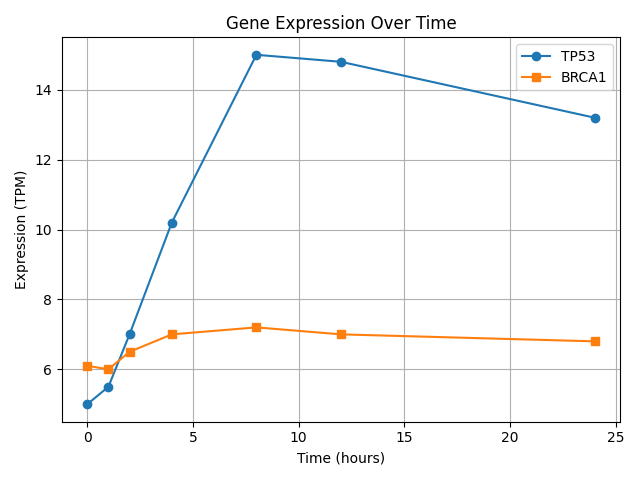

<Figure size 640x480 with 0 Axes>

In [5]:
# Create line chart
plt.plot(df['time'], df['TP53'], marker='o', label='TP53')
plt.plot(df['time'], df['BRCA1'], marker='s', label='BRCA1')
plt.xlabel('Time (hours)')
plt.ylabel('Expression (TPM)')
plt.title('Gene Expression Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()

# plt.show() # normal matplotlib show

show_with_alt() # matplotalt show with alt text

You may wonder, I don't see any difference? This is because the default output is HTML, so if we export this notebook to HTML it has the alt text embedded. To also show it in markdown, we can add this to the methods. This also shows a table with the visualization.

A line plot titled 'gene expression over time'. Time (hours) is plotted on the x-axis from -5 to 30 and expression (tpm) is plotted on the y-axis from 4 to 16, both using linear scales. Tp53 is plotted in dark blue and brca1 is plotted in orange. Tp53 has a minimum value of y=5 at x=-5, a maximum value of y=15 at x=15, and an average of y=10.1. Brca1 has a minimum value of y=6 at x=0, a maximum value of y=7.2 at x=15, and an average of y=6.657.
data table:

| time (hours) | tp53 (expression (tpm)) | brca1 (expression (tpm)) | expression (tpm) ticklabels |
| ------------ | ----------------------- | ------------------------ | --------------------------- |
| 0            | 5                       | 6.1                      | 4                           |
| 1            | 5.5                     | 6                        | 6                           |
| 2            | 7                       | 6.5                      | 8                           |
| 4            | 10.2                    | 7                        | 10                          |
| 8            | 15                      | 7.2                      | 12                          |
| 12           | 14.8                    | 7                        | 14                          |
| 24           | 13.2                    | 6.8                      | 16                          |


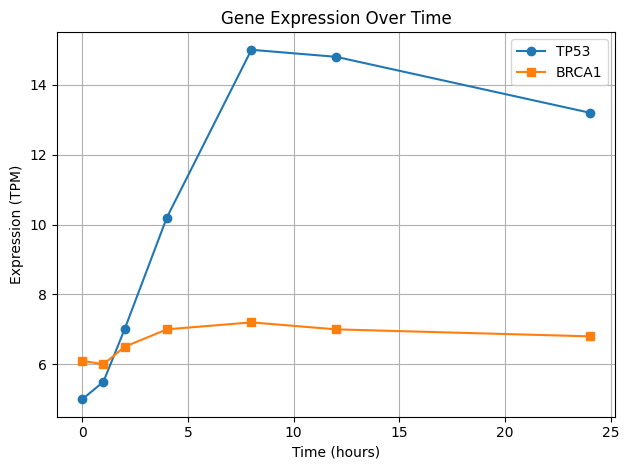

<Figure size 640x480 with 0 Axes>

In [6]:
# Create line chart
plt.plot(df['time'], df['TP53'], marker='o', label='TP53')
plt.plot(df['time'], df['BRCA1'], marker='s', label='BRCA1')
plt.xlabel('Time (hours)')
plt.ylabel('Expression (TPM)')
plt.title('Gene Expression Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()

show_with_alt(methods=['HTML', 'markdown'])

A few more options from MatplotAlt: 
1. There are more export options, such as png.
2. If the chart type cannot be automatically detected, we can add it with e.g. `chart_type=heatmap`.
3. We can also separate the generation of alt (with `generate_alt_text`) text and the addition of alt text to the figure (with `add_alt_text`). This way, we can also write our own alt text and add it, however, this will not get updated automatically.
4. We can set the level of description (1-3, default 2) (as in [Lundgard & Satyanarayan's 2022 paper](https://vis.csail.mit.edu/pubs/vis-text-model/)).

Feel free to play around and access the [MatplotAlt documentation](https://matplotalt.readthedocs.io/en/latest/index.html).

## Data Tables
We always want to show a table of our data, so we can see what it looks like. In the life sciences, we often work with large tables. With `df` or `df.head()` we can show the table. However, if there are too many rows or columns, it becomes hard to navigate. Think about the total number of cells that is shows, and thus the number of tabs someone has to do navigate the table with a keyboard. Usually, we include a table preview to show the general idea of the data. With this, we can also show a subset.

In [7]:
# Create a sparse matrix with random data
genes = [f"Gene_{i}" for i in range(0, 1000)]
samples = [f"Sample_{i}" for i in range(0, 100)]

# Poisson distributino with binomial mask for sparsity
data = np.random.poisson(lam=300, size=(1000, 100))
mask = np.random.binomial(n=1, p=0.3, size=data.shape)
data_sparse = data * mask

df = pd.DataFrame(data_sparse, index=genes, columns=samples)

print(f"DataFrame shape: {df.shape}")

# Display the first 5 rows and columns of the DataFrame and set a caption
df.iloc[:5, :5].style.set_caption("First 5 genes across 5 samples from a sparse matrix.")

DataFrame shape: (1000, 100)


,Sample_0,Sample_1,Sample_2,Sample_3,Sample_4
Gene_0,294,312,280,0,319
Gene_1,288,307,0,0,0
Gene_2,289,0,306,0,0
Gene_3,0,0,0,0,0
Gene_4,0,0,284,0,0


## Final notes
This was a brief introduction for notebook accessibility. In general, adding any of these will help to create a more accessible notebook and better user experience. It is easy to think "Oh, I will fix this when I publish it", but it helps to directly work on this as you are creating notebooks. Please refer to the resources mentioned at the top of this notebook for more information!